# Noise reduction

## Where does noise come from?

### Noise sources
Noise sources can be broadly categorized as : 

* Implicit errors
    * These are introduced at the level of data collection planning
    * E.g., Incorrect naming conventions
    
* Explicit errors
    * Faulty data collection
    * Data entry problems
    * Technology limitations
    

### Impact of noise 

Quality of the model depends on:
* Quality of the training data
    * Some organizations used to spend millions of dollars to detect errors by hand [[1]], but manual process of cleaning data is laborious and error prone(https://uk.artechhouse.com/Data-Quality-for-the-Information-Age-P528.aspx)
    * Therefore, tools were needed to automate and assist in data cleansing process
* Robustness of the model against noise 
    * This is usually incorporated in terms of inductive biases or training procedure to make the models robust to noise 
    * E.g., cross-validation prevents overfiting to noise
    
Models learned from noisy data will already have low performance, therefore any of the techniques to prevent overfitting will have less impact on the overall performance. 
Thus, handling noise from the data before hypothesis formation is important.
    
[[1] Data Quality for the information age](https://uk.artechhouse.com/Data-Quality-for-the-Information-Age-P528.aspx) 


### Data Quality: Noise 

Based on the information sources, noise can be further categorized as:

* Label noise 
    * inadequate data annotation
    * E.g., contradictory examples: same attributes are labeled as two different classes, or misclassification: wrong labeling of data 
    
* Attribute noise
    * errors introduced at the level of attributes
    * E.g., incorrect data entries, measurement inaccuracies, missing values
    
Both types of noise will obscure the relationship between the attributes and the label. 

### Noise examples: Image

Sources of noise in images:
* Image acquisition: e.g., due to image sensor's limitations
* Image transmission: e.g., random bit errors

Types of noise in images:
* Gaussian noise 
* salt-and-pepper noise
* shot noise
* and many more

<table>
    <tr>
        <td><img src="img/Original-Lena-image-taken-as-reference.png" width="200"></td>
        <td><img src="img/Noisy-image-Gaussian-noise-with-mean-and-variance-0005.png" width="200"></td>
    </tr>
</table>

<img src="img/noisy-image-cameraman.png" width="500">

[Noise in images](https://www2.ph.ed.ac.uk/~wjh/teaching/dia/documents/noise.pdf)



### Noise examples: Audio 

Sources of noise in audio:
* Audio acquisition: e.g., background noise that interferes with the signal of interest 
* Audio transmission

<img src="img/audio-noise-plot.png" width="500">

### Noise examples: Structured Noise 

1. Motion blur
<img src="img/motion-blur.png" width="500">

2. Watermarks
[source](https://www.diyphotography.net/nvidia-trains-ai-to-remove-noise-and-watermarks-by-looking-only-at-corrupted-photos/)

<img src="img/watermarks.png" width="500" height="200">

3. Distortion 
E.g., various types of distortion in captured image by a camera is corrected offline. [source](https://medium.com/swlh/i-see-you-computer-vision-fundamentals-64cc662d0b05)
<img src="img/distortion.png" width="500" height="100">

4.Occlusion [source](https://stackoverflow.com/questions/2764238/image-processing-what-are-occlusions)

<img src="img/occlusion.png" width="500">

and many more ...

## Denoising techniques: Noise reduction

* Noise is very difficult to remove without prior knowledge of the noise model
* Different techniques are available depending on the type of data
* Methods
    * Rolling-window
    * Convolution 
    * More complex filters
    * Machine Learning based filters
    * Autoencoders

### Rolling window

* A window is defined as a group of $n$ observations appearing as neighbours
* Datapoint in the dataset is replaced by the summary statistic (e.g., mean, median, mode, etc.) of the window around this datapoint
* A sliding window through the datapoints create a rolling window filter for smoothing 
* It can be used for images or time series data
* Mean filter uses mean as its summary statistic. Similarly, median filter can be described. 

<table>
    <tr>
        <td> Pros </td>
        <td> Cons </td>
    </tr>
    <tr>
        <td> <ul>
            <li>Simple to compute</li>
            <li></li>
            </ul>
         </td>
        <td> 
            <ul>
                <li> Can't take care of edges </li>
            </ul>
        </td>
    </tr>
</table>

### Rolling window (Example)

In [1]:
import requests
import io
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

r = requests.get("https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv", allow_redirects=True)
data = pd.read_csv(io.StringIO(r.content.decode('ascii')))

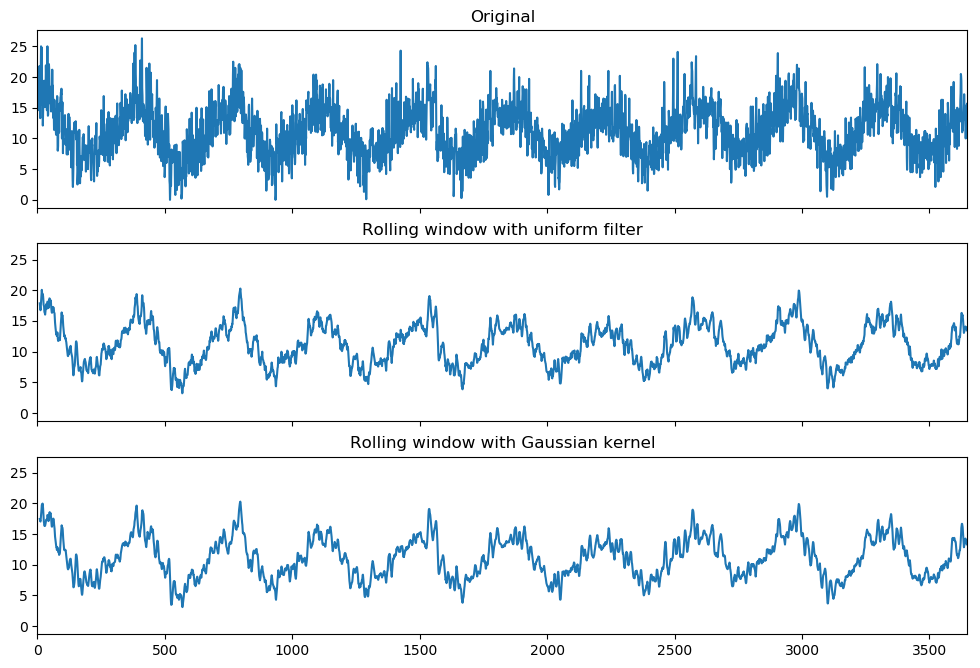

In [2]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(12, 8), dpi=100, sharex=True, sharey=True)

# original data
data['Temp'].plot(ax=axs[0],title="Original")

WINDOW_SIZE=10
# using pandas to create rolling windows and applying function to it
data['Temp'].rolling(WINDOW_SIZE).mean().plot(ax=axs[1], title="Rolling window with uniform filter") # sum is weighted by uniform distribution mean filter
data['Temp'].rolling(WINDOW_SIZE, win_type="gaussian").mean(std=data['Temp'].std()).plot(ax=axs[2], title="Rolling window with Gaussian kernel") # sum is weighted by guassian distribution

### Convolution

* Convolution is a mathematical operation that generates a new function from two prior functions. We use $f$ and $g$ to represent these prior functions
* Discrete convolution
$$ (f * g)(x) = \sum\limits_{t=-\inf}^{+\inf} f(t)g(x-t) $$
* Continuous convolution 
$$ (f * g)(x) = \int\limits_{t=-\inf}^{+\inf} f(t)g(x-t)dt $$
* $f$ is the kernel of the convolution and $g$ is the input function
* Geometrical interpretation: It represents the amount of overlap between two functions

### Convolution (contd.)

* Convolution of vectors used for 1D data (e.g., time series, audio data, etc.)

    * if $\mathbf{a} = [a_1, a_2, ..., a_m]$ and $\mathbf{b} = [b_1, b_2, ..., b_n]$, then $\mathbf{c} = \mathbf{a} * \mathbf{b}$ is defined as $\mathbf{c} = [c_1, c_2, ..., c_{n-m+1}]$, where

    $$c_x = \sum\limits_{u} a_u b_{x-u+1}\quad,$$

    where $u$ ranges over all legal subscripts of $a_u$ and $b_{x-u+1}$, i.e, $u = \max(1, x-n+1) ... \min(x,m)$
    *  Use $m = 1$: $\mathbf{c} = a_1 \mathbf{b}$
    *  Use $m = 2$, $\mathbf{a} = [1/2, 1/2]$: Rolling-window operator with mean statistic

* Convolution of matrices used for 2D data (e.g., images, [audio: mel-spectrum](https://towardsdatascience.com/getting-to-know-the-mel-spectrogram-31bca3e2d9d0))

    * If $\mathbf{A}$ is an $(n \times m)$ matrix and $\mathbf{B}$ is a $(p \times q)$ matrix, then $\mathbf{C} = \mathbf{A} * \mathbf{B}$ is defined by a $(n+p-1 \times m+q+1)$ matrix with $c_{xy}$ as

    $$ c_{xy} = \sum\limits_u\sum\limits_v a_{uv}b_{x-u+1,y-v+1}\quad,$$
    
    where $u$ and $v$ vary over legal subscripts of $a_{uv}$ and $b_{x-u+1, y-v+1}$


* Rolling window operators can, thus, be defined in terms of convolution

### Convolution (Example)

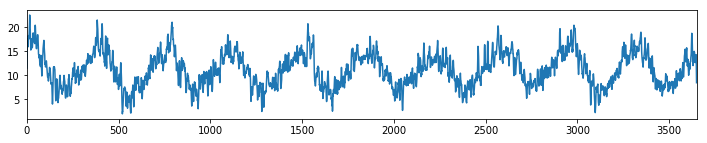

In [3]:
## Vector convolution;
# Using numpy's convolve to compute moving average of window size 
WINDOW_SIZE=5
data['Temp_MA'] = np.convolve(data['Temp'], np.ones(WINDOW_SIZE), mode='same') / WINDOW_SIZE
_ = data['Temp_MA'].plot(figsize=(12, 2))

Original image in 2D matrix:
 [[0.48523098 0.48523098 0.47738784 ... 0.11692392 0.11692392 0.11692392]
 [0.49699569 0.49307412 0.48523098 ... 0.12336824 0.1225349  0.1272898 ]
 [0.50849255 0.50457098 0.49475569 ... 0.12336039 0.12728196 0.13120353]
 ...
 [0.24786745 0.29884784 0.40501294 ... 0.58914824 0.58914824 0.58914824]
 [0.38173647 0.42487373 0.39628392 ... 0.57403529 0.57403529 0.57795686]
 [0.42487373 0.36883294 0.36042431 ... 0.55442745 0.55442745 0.55834902]]


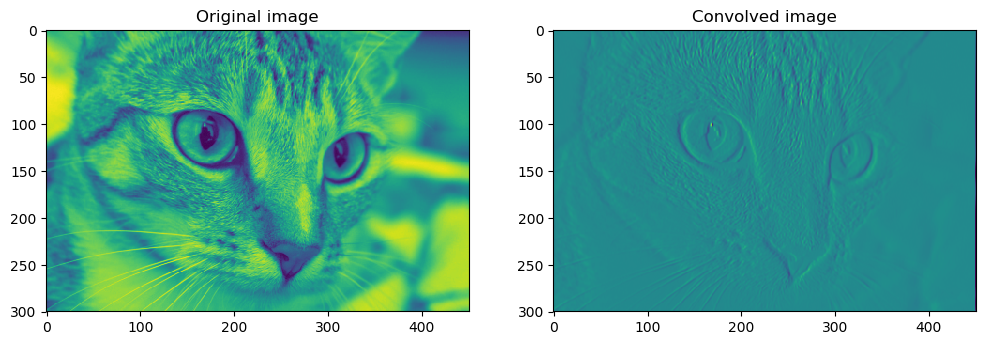

In [4]:
## Matrix convolution 
import scipy
import skimage.data

img = skimage.data.chelsea()  # 3D array
img = skimage.color.rgb2gray(img) # 2D array
print("Original image in 2D matrix:\n", img)

fig, axs = plt.subplots(nrows=1, ncols=2, dpi=100, figsize=(12, 4))
axs[0].imshow(img)
_ = axs[0].set_title("Original image")


# Edge detector convolution 
K = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])

conv_img = scipy.signal.convolve2d(img, K, mode="same")
axs[1].imshow(conv_img)
_= axs[1].set_title("Convolved image")

### Digital filters

* These involve smarter mathematical adaptations of rolling window operators and convolutions
* Eg., Savitzky-Golay filters use a piecewise-polynomial to fit the data; it increases precision in data without distorting the signal
* There are several filters available. [scipy.signal](https://docs.scipy.org/doc/scipy/reference/signal.html#filtering)

### Digital filters (Example)

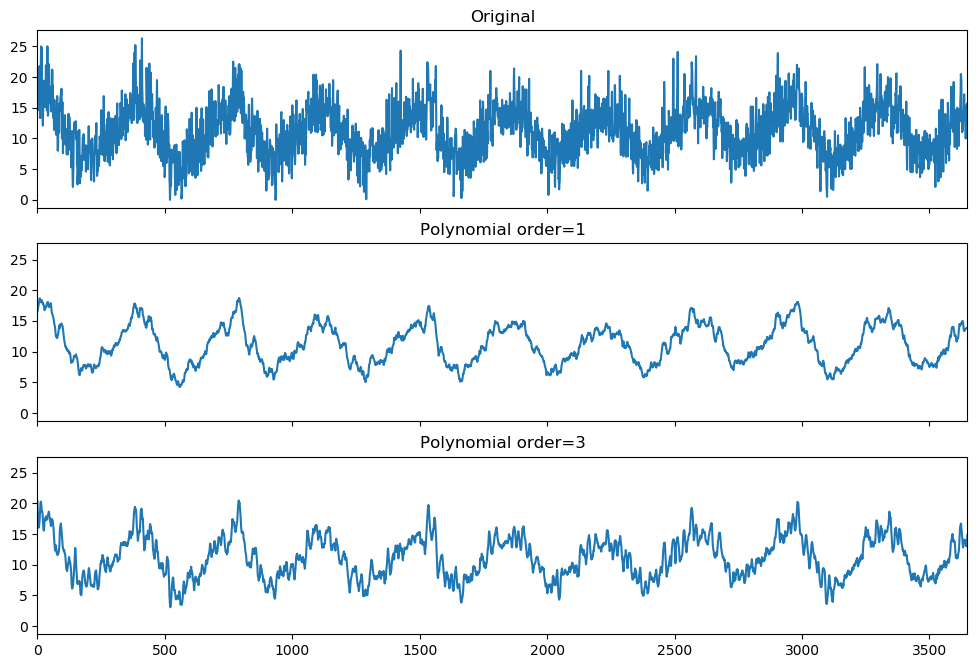

In [5]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(12, 8), dpi=100, sharex=True, sharey=True)

WINDOW_SIZE=19
data['Temp_savgol_2'] = scipy.signal.savgol_filter(data['Temp'], window_length=WINDOW_SIZE, polyorder=1)
data['Temp_savgol_3'] = scipy.signal.savgol_filter(data['Temp'], window_length=WINDOW_SIZE, polyorder=3)

data['Temp'].plot(ax=axs[0], title="Original")
data['Temp_savgol_2'].plot(ax=axs[1], title="Polynomial order=1")
data['Temp_savgol_3'].plot(ax=axs[2], title="Polynomial order=3")


### Machine learning filters

* These are more general filters, i.e., these can be used for tabular data 
* It assumes that the machine learning models are good enough to learn explainable variance, therefore outliers are detected as noise
* There are several ways to build such filters using machine learning models (ensemble or stand-alone). See [here for some examples].(https://sci2s.ugr.es/noisydata#Using%20noise%20filters%20to%20reduce%20noise's%20effects)

### Denoising Autoencoders (DAE)

* DAEs are feedforward networks that take the noisy input $\tilde{\mathbf{x}} \sim q_{\mathcal{D}}(\tilde{\mathbf{x}} | \mathbf{x})$ and output the original denoised input $\mathbf{x}$, where $q_{\mathcal{D}}(. | \mathbf{x})$ is the stochastic corruption function conditional on the input $\mathbf{x}$
* Input is noised according to $q_{\mathcal{D}}$ only at the training time
* Idea is to learn robust intermediate representation of the corrupted input from which it is easy to recreate the original input
    * imagine that the original uncorrupted input lies on some non-linear manifold, but the corrupted input displaced the input from this manifold
    * $f_{\theta} \dot g_{\theta'}$ leans to map corrupted inputs back on to the manifold [see section 3.2 of [2]](https://www.jmlr.org/papers/volume11/vincent10a/vincent10a.pdf)
* If $f_{\theta}: \mathbb{R}^{d_{in}} \rightarrow \mathbb{R}^{d_{latent}}$ to denote the **encoder** that maps input to a latent space
* If $g_{\theta'}: \mathbb{R}^{d_{latent}} \rightarrow \mathbb{R}^{d_{in}}$ to denote the **decoder** that reconstructs the latent representation of the input back to the input
* A typical example of $f_{\theta}$ (or $g_{\theta'}$) implementing a 1-layer feedforward network is $f_{\theta} = max(\mathbf{0}, \mathbf{x}\mathbf{\theta})$, where $\theta \in \mathbb{R}^{d_{in} \times d_{latent}}$ , and $\max$ is an elementwise maximum operator.
* $\theta$ and $\phi$ are learned to minimize the loss reconstruction (e.g., squared distance or cross-entropy) function $\mathcal{L}$
$$\mathcal{L} = \frac{1}{N}\sum\limits_{i=1}^{N}|| \mathbf{x}_i - f_{\theta}(g_{\theta'}(\hat{\mathbf{x}}_i)) ||_2$$


<img src="img/dae.png" width="1000">

[[2] Stacked Denoising Autoencoders: Learning Useful Representations in
a Deep Network with a Local Denoising Criterion](https://www.jmlr.org/papers/volume11/vincent10a/vincent10a.pdf)

### Denoising Autoencoders (application)

* DAEs are used to denoise images, audio, 1D data, etc. 
* Any noise model can be used to corrupt the inputs 
    * Additive Gaussian noise
    * Salt and pepper noise
    * Masking noise (occlusion)
    * Distortion noise
    
<img src="img/ae_example.png" width="500">



Now open the following workbook: `noise-reduction-practical.ipynb`

<img src="img/ae.png" width="500">